### Set the Folder

In [1]:
from google.colab import drive
drive.mount('/content/drive')

MYPATH1='/content/drive/MyDrive/colabData/yolov4-tongue/'
MYPATH1_project_darknet=MYPATH1+'darknet'
MYPATH1_project_darknet_cfg=MYPATH1+'darknet/cfg/'

Mounted at /content/drive


### Get Darknet project

In [2]:
#we clone the fork of darknet maintained by roboflow
#small changes have been made to configure darknet for training

%cd $MYPATH1
%rm -rf darknet
#下載原始程式
!git clone https://github.com/roboflow-ai/darknet.git

/content/drive/MyDrive/colabData/yolov4-tongue
Cloning into 'darknet'...
remote: Enumerating objects: 13289, done.
remote: Total 13289 (delta 0), reused 0 (delta 0), pack-reused 13289
Receiving objects: 100% (13289/13289), 12.17 MiB | 4.85 MiB/s, done.
Resolving deltas: 100% (9047/9047), done.
Checking out files: 100% (2002/2002), done.


In [3]:
%cd $MYPATH1_project_darknet

/content/drive/MyDrive/colabData/yolov4-tongue/darknet


### Modify the Makefile

In [4]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile

#set non GPU Env.
!sed -i 's/GPU=1/GPU=0/g' Makefile
!sed -i 's/CUDNN=1/CUDNN=0/g' Makefile

!sed -i "s/ARCH= -gencode arch=compute_60,code=sm_60/ARCH= -gencode arch=compute_${compute_capability},code=sm_${compute_capability}/g" Makefile

### Compile darknet

In [ ]:
%cd $MYPATH1_project_darknet

!make

### Get the Yolov4 cfg file

In [11]:
%cd $MYPATH1_project_darknet
import os

if os.path.isfile('cfg/yolov4-tiny.cfg')==False:
  !wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4-tiny.cfg -P $MYPATH1_project_darknet_cfg

if os.path.isfile('cfg/yolov4.cfg')==False:
  !wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg -P $MYPATH1_project_darknet_cfg


if os.path.isfile('yolov4-tiny.weights')==False:
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights -P  $MYPATH1_project_darknet


if os.path.isfile('yolov4.weights')==False:
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4.weights -P  $MYPATH1_project_darkne

/content/drive/MyDrive/colabData/yolov4-tongue/darknet
wget: option requires an argument -- 'P'
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


### Check the raw img data

/content/drive/MyDrive/colabData/yolov4-tongue/darknet


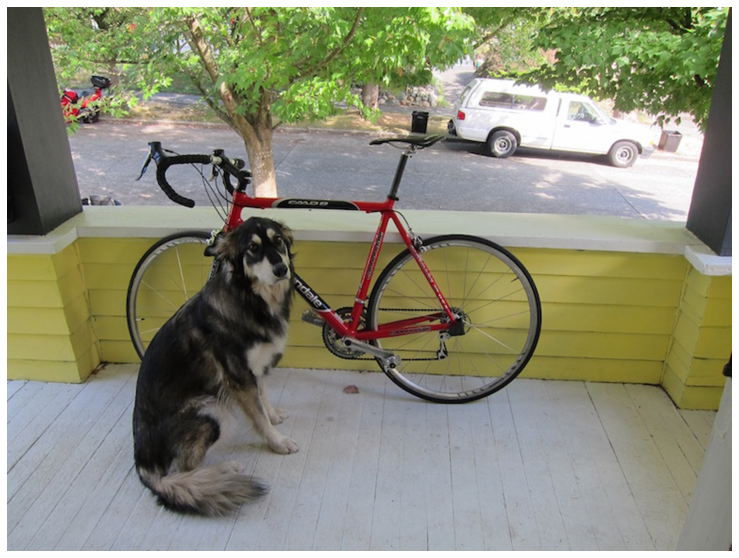

In [7]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path) # 打開檔案
  height, width = image.shape[:2]
  #改變圖片大小
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  #chart視窗
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  #顯示圖片
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

%cd $MYPATH1_project_darknet
imShow('data/dog.jpg')

### Use YoloV4

In [8]:
%cd $MYPATH1_project_darknet
!chmod 777 ./darknet

/content/drive/MyDrive/colabData/yolov4-tongue/darknet


In [ ]:
%cd $MYPATH1_project_darknet

!./darknet detect cfg/yolov4.cfg yolov4.weights $MYPATH1_project_darknet/data/dog.jpg

#imShow('predictions.jpg')

### Use YoloV4-tiny

/content/drive/MyDrive/colabData/yolov4-tongue/darknet
 GPU isn't used 
 OpenCV version: 3.2.0
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	                           ->  104 x 104 x 128 
   9 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
  10 conv    128       3 x 3/

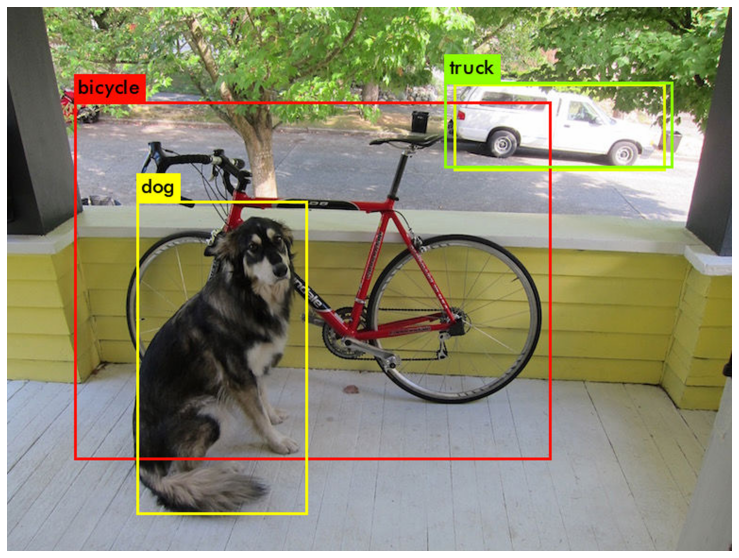

In [12]:
%cd $MYPATH1_project_darknet

!./darknet detect cfg/yolov4-tiny.cfg yolov4-tiny.weights $MYPATH1_project_darknet/data/dog.jpg

imShow('predictions.jpg')